In [17]:
import pandas as pd

In [18]:
df = pd.read_parquet("../data/interim/cleaned_data.parquet")

In [23]:
df.head()

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPact (mbar),VPdef (mbar),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,-8.90,93.3,3.11,0.22,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,-9.28,93.4,3.02,0.21,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,-9.31,93.9,3.01,0.20,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,-9.07,94.2,3.07,0.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,-9.04,94.1,3.08,0.19,0.32,0.63,214.3


In [ ]:
# Check distributions of pressure, wind, humidity
df.describe()

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPact (mbar),VPdef (mbar),wv (m/s),max. wv (m/s),wd (deg)
count,420224,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000
mean,2012-12-30 09:17:41.471024640,989.214157,9.442421,4.953472,76.028738,9.532333,4.036225,2.129972,3.530998,174.748064
min,2009-01-01 00:10:00,913.600000,-23.010000,-25.010000,12.950000,0.790000,0.000000,0.000000,0.000000,0.000000
25%,2010-12-31 13:47:30,984.200000,3.360000,0.230000,65.240000,6.210000,0.870000,0.990000,1.760000,124.900000
50%,2012-12-30 03:05:00,989.580000,9.400000,5.210000,79.300000,8.860000,2.180000,1.760000,2.960000,198.100000
75%,2014-12-30 08:32:30,994.730000,15.460000,10.070000,89.400000,12.350000,5.290000,2.860000,4.730000,234.100000
max,2017-01-01 00:00:00,1015.350000,37.280000,23.110000,100.000000,28.320000,46.010000,28.490000,23.500000,360.000000
std,NaN,8.360888,8.421135,6.731171,16.460467,4.183996,4.891287,1.544301,2.338056,86.685323


In [ ]:
# Check monotonic datetime
df = df.sort_values('Date Time')
is_monotonic = df['Date Time'].is_monotonic_increasing
dup = df["Date Time"].duplicated().sum()
gaps = df["Date Time"].diff().value_counts().head()

print(is_monotonic)
print(dup)
print(gaps)

True
0
Date Time
0 days 00:10:00    420218
0 days 00:20:00         2
0 days 00:30:00         1
0 days 16:00:00         1
3 days 02:20:00         1
Name: count, dtype: int64


<Axes: >

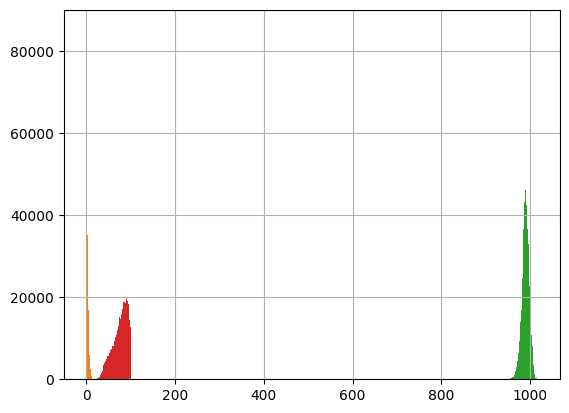

In [24]:
df["wv (m/s)"].hist(bins=50)
df["max. wv (m/s)"].hist(bins=50)
df["p (mbar)"].hist(bins=50)
df["rh (%)"].hist(bins=50)

total null: Date Time        0
p (mbar)         0
T (degC)         0
Tdew (degC)      0
rh (%)           0
VPact (mbar)     0
VPdef (mbar)     0
wv (m/s)         0
max. wv (m/s)    0
wd (deg)         0
dtype: int64
large run: Series([], Name: wv (m/s), dtype: int64)


<Axes: >

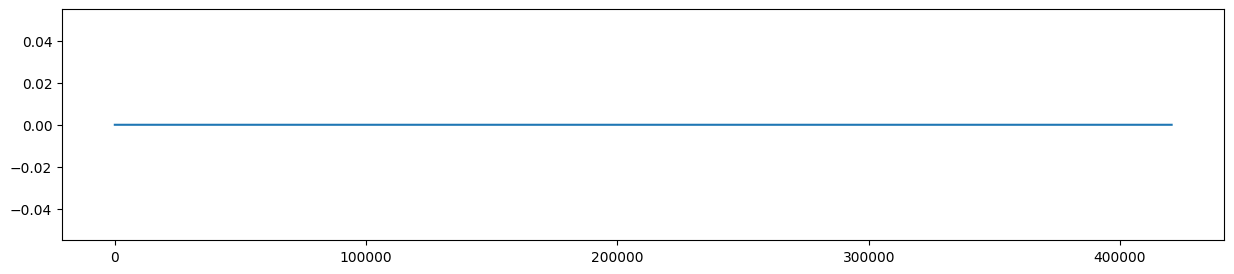

In [ ]:
# Verify no large holes remain
NaNCount = df.isna().sum()

isna = df["wv (m/s)"].isna()
runs = isna.groupby((isna != isna.shift()).cumsum()).sum()
large_runs = runs[runs > 3]

print(f'total null: {NaNCount}')
print(f'large run: {large_runs}')

# timeline plot
df["wv (m/s)"].isna().astype(int).plot(figsize=(15,3))